In [186]:
import pandas as pd
import numpy as np
import requests
import os
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns
import folium
from scipy import stats
print('Complete')

Complete


In [187]:
veg_rest = pd.read_csv('../input/veg-rest/veg_restaurant_data.csv')
veg_rest.head()

,Unnamed: 0,Borough,Neighborhood,ID,Name,Likes,Rating,Price
0,1,Brooklyn,Prospect Heights,4ad8d0e5f964a520f11421e3,Natural Blend,71.0,8.7,2.0
1,2,Brooklyn,Bushwick,5bb8eec1e0c0c900399d30c6,Hartbreakers,27.0,8.8,1.0
2,3,Brooklyn,Bushwick,5ac63c9a18d43b72307a7248,Sol Sips,9.0,7.3,2.0
3,4,Brooklyn,Fort Greene,583b8d56a6118c60b5cfdc4b,LuAnne's Wild Ginger,20.0,8.3,3.0
4,6,Brooklyn,Clinton Hill,583b8d56a6118c60b5cfdc4b,LuAnne's Wild Ginger,20.0,8.3,2.0


In [188]:
veg_rest[veg_rest['Price'] == 1].count()

Unnamed: 0      4
Borough         4
Neighborhood    4
ID              4
Name            4
Likes           4
Rating          4
Price           4
dtype: int64

In [189]:
veg_rest[veg_rest['Price'] == 2].count()

Unnamed: 0      31
Borough         31
Neighborhood    31
ID              31
Name            31
Likes           31
Rating          31
Price           31
dtype: int64

In [190]:
veg_rest[veg_rest['Price'] == 3].count()

Unnamed: 0      2
Borough         2
Neighborhood    2
ID              2
Name            2
Likes           2
Rating          2
Price           2
dtype: int64

In [191]:
vc = veg_rest["Neighborhood"].value_counts()
vc

East Village         3
East Williamsburg    2
Bushwick             2
Upper West Side      2
North Side           2
Soho                 2
Upper East Side      1
Tribeca              1
Murray Hill          1
Lenox Hill           1
Ridgewood            1
Grasmere             1
Little Italy         1
Greenwich Village    1
Downtown             1
Rockaway Beach       1
Clinton Hill         1
Midtown South        1
Prospect Heights     1
Fort Greene          1
Civic Center         1
Astoria              1
Clinton              1
Carnegie Hill        1
Flatiron             1
Noho                 1
South Jamaica        1
South Side           1
Chinatown            1
Sutton Place         1
Name: Neighborhood, dtype: int64

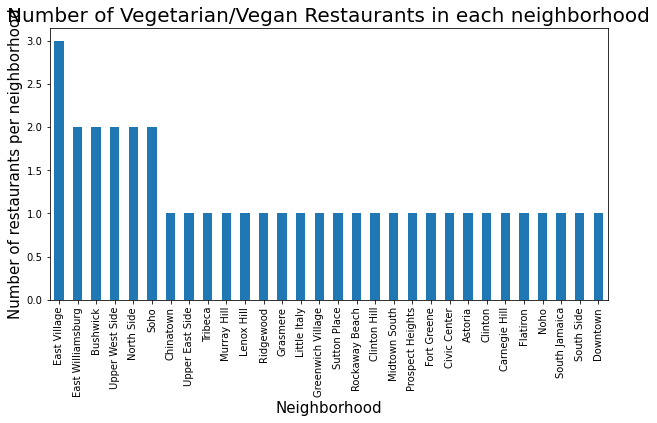

In [192]:
vc.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title('Number of Vegetarian/Vegan Restaurants in each neighborhood', fontsize=20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Number of restaurants per neighborhood', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

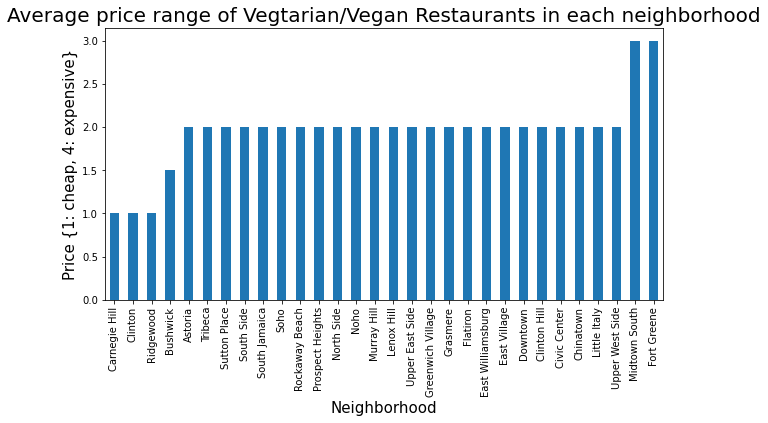

In [193]:
veg_rest.groupby('Neighborhood').mean()['Price'].sort_values(ascending=True).plot.bar(figsize=(10,5))
plt.title('Average price range of Vegtarian/Vegan Restaurants in each neighborhood', fontsize=20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Price {1: cheap, 4: expensive}', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

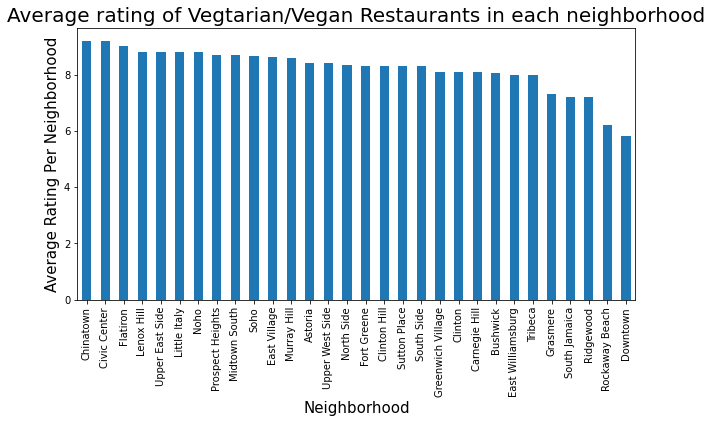

In [194]:
veg_rest.groupby('Neighborhood').mean()['Rating'].sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title('Average rating of Vegtarian/Vegan Restaurants in each neighborhood', fontsize=20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating Per Neighborhood', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

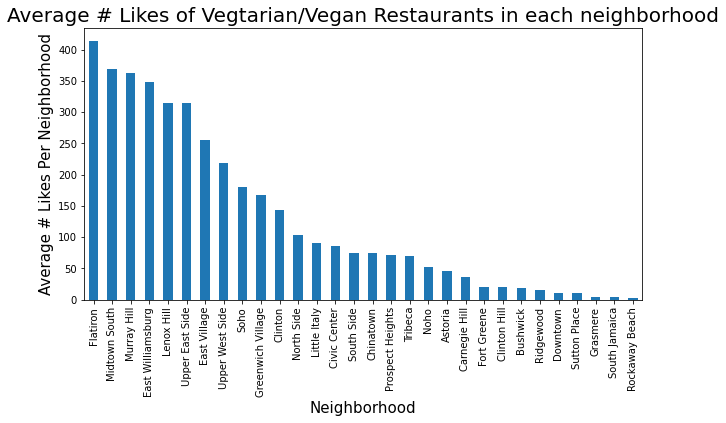

In [195]:
veg_rest.groupby('Neighborhood').mean()['Likes'].sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title('Average # Likes of Vegtarian/Vegan Restaurants in each neighborhood', fontsize=20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Average # Likes Per Neighborhood', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

In [196]:
# calculating the correlation and p-value of likes to rating
stats.pearsonr(veg_rest["Likes"], veg_rest["Rating"])

0.4547895916625712

The correlation coefficient is 0.455, which indicates a positive relationship between likes and rating.
The p-value is 0.004684, which means there is a moderate certainty of the result.

In [197]:
veg_rest["Price"] = veg_rest['Price'].astype('int')

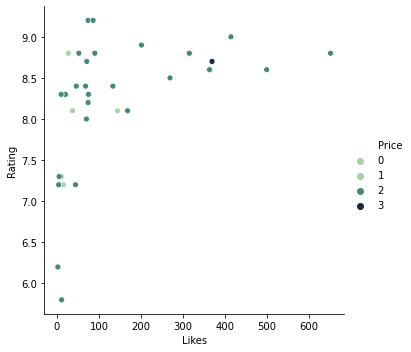

In [198]:
sns.relplot(x="Likes", y="Rating", hue="Price", palette="ch:r=-.5,l=.75", data=veg_rest);

It looks like a majority of vegetarian restaurants range around 11-20 dollars per meal, which means it has 2 dollar signs on the price. It has a large range on likes and ratings. The restaurants that had 1 dollar sign tended to be rated average, but also tended to have less likes, because it was not as common to have a vegetarian/vegan restaurant under 11 dollars in New York City. It is least common to have a vegetarian/vegan restaurant, where the average person over 20 dollars in New York City. However, it tended to have a rating that was higher than average, and had a lot of likes.

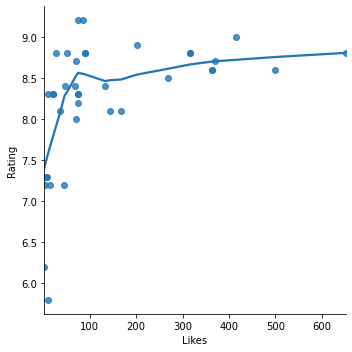

In [199]:
sns.lmplot(x="Likes", y="Rating", data=veg_rest,
           lowess=True)

Since linear, polynomial, nor cubic regression do not predict the trend well, I chose to use lowess smoother. Based on the lowess smoother, it appears that the trend tended to go up with the rating until there were about 100 likes. If the vegetarian/vegan restaurant has at least 100 likes on FourSquare, there may be a chance that it is good enough to go to.

# Let's find out which neighborhood in New York, NY has the best vegetarian/vegan restaurants

veg_rest_rank = veg_rest

In [200]:
veg_rest_rank = veg_rest.iloc[:,[2,5,6,7]]
veg_rest_rank

,Neighborhood,Likes,Rating,Price
0,Prospect Heights,71.0,8.7,2
1,Bushwick,27.0,8.8,1
2,Bushwick,9.0,7.3,2
3,Fort Greene,20.0,8.3,3
4,Clinton Hill,20.0,8.3,2
5,Downtown,11.0,5.8,2
6,East Williamsburg,651.0,8.8,2
7,East Williamsburg,44.0,7.2,2
8,North Side,133.0,8.4,2
9,North Side,75.0,8.3,2


In [201]:
veg_rest_avg = veg_rest_rank.groupby(['Neighborhood'], as_index=False).mean()
veg_rest_avg

,Neighborhood,Likes,Rating,Price
0,Astoria,46.0,8.400000,2.0
1,Bushwick,18.0,8.050000,1.5
2,Carnegie Hill,37.0,8.100000,1.0
3,Chinatown,74.0,9.200000,2.0
4,Civic Center,86.0,9.200000,2.0
5,Clinton,144.0,8.100000,1.0
6,Clinton Hill,20.0,8.300000,2.0
7,Downtown,11.0,5.800000,2.0
8,East Village,256.0,8.633333,2.0
9,East Williamsburg,347.5,8.000000,2.0


In [202]:
L = veg_rest_rank['Likes'].mean()
r = veg_rest_rank['Rating'].mean()
def weighted_rating(x, m=m, C=C):
    l = x['Likes']
    R = x['Rating']
    return  ((m/(m+l)) * r) + ((l/(l+m)) * L)

In [203]:
veg_rest_rank['Score'] = veg_rest_rank.apply(weighted_rating, axis=1)
veg_rest_rank = veg_rest_rank.sort_values('Score', ascending=False)
veg_rest_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Likes,Rating,Price,Score
6,East Williamsburg,651.0,8.8,2,141.021408
19,East Village,499.0,8.6,2,140.517593
36,Flatiron,414.0,9.0,2,140.077718
34,Midtown South,369.0,8.7,3,139.764593
14,Upper West Side,364.0,8.6,2,139.725128
17,Murray Hill,363.0,8.6,2,139.717108
12,Upper East Side,315.0,8.8,2,139.273762
13,Lenox Hill,315.0,8.8,2,139.273762
25,Soho,269.0,8.5,2,138.704834
20,East Village,201.0,8.9,2,137.405604


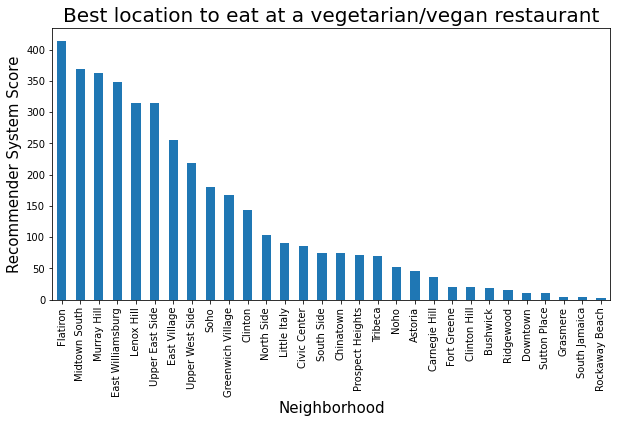

In [204]:
veg_rest_rank.groupby('Neighborhood').mean()['Likes'].sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title('Best location to eat at a vegetarian/vegan restaurant', fontsize=20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Recommender System Score', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

If you want to visit a neighborhood that has the best vegetarian/vegan restaurants, Flatiron leads the other neighborhoods. The lowest rank is Rockaway Beach, so watch out for that neighborhood.



Top 3:

1.) Flatiron

2.) Midtown South

3.) Murray Hill


Bottom 3:

1.) Rockaway Beach

2.) South Jamaica

3.) Grasmere


Keep in mind, there are more neighborhoods out there, and some are not listed.